<a href="https://colab.research.google.com/github/HenriqueAlencar2025/mvp-henriquealencar/blob/main/MVP_Henrique_Alencar(ML%26Analytics).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP: Machine Learning & Analytics
Autor: Henrique Bittencourt de Alencar

Data: 28/09/2025

Matrícula: 4052025000135

Dataset: [Student Depression Dataset](https://www.kaggle.com/datasets/adilshamim8/student-depression-dataset/data)


# Descrição do Problema

O conjunto de dados **Student Depression** é um conjunto multivariado que reúne informações sobre a saúde mental de estudantes, com ênfase na identificação e análise de fatores associados à depressão. O objetivo principal é prever se um estudante está enfrentando depressão com base em variáveis demográficas, acadêmicas, profissionais e comportamentais.

## Hipóteses do Problema

As hipóteses que tracei são as seguintes:

- Existe um comportamento diferente entre as classes (com depressão e sem depressão) em relação ao desempenho acadêmico?

- Existe uma correlação entre pressão acadêmica e estresse financeiro?

- Estudantes que dormem menos tem maior chance de desenvolverem depressão?

- É possível prever razoavelmente qual estudante pode ter ou não depressão com base em variáveis demográficas, acadêmicas, profissionais e comportamentais?




## Tipo de Problema

Este é um problema de **classificação supervisionada**. Dado um conjunto de características (gênero, idade, cidade, profissão, pressão acadêmica,
       pressão no trabalho, desempenho acadêmico, satisfação acadêmica, satisfação no trabalho, sono, dieta, graduação, pensamentos suicidas, horas de estudo/trabalho,
       estresse financeiro, histórico familiar), o objetivo é prever se algum determinado estudante apresenta sinais de depressão (Sim ou Não), ou seja, auxiliar na identificação precoce de estudantes em risco.

## Seleção de Dados

Não foram impostas nenhumas restrições ou condições na seleção dos dados. O conjunto Student Depression já está pronto para uso e foi utilizado em sua totalidade.

## Atributos do Dataset

O dataset Student Depression contém 27901 amostras e 18 atributos:

- ***Id*** - número identificador do estudante
- ***Gênero*** - gênero (Male = Masculino, Female = Feminino, Other = Outros)
- ***Idade*** - idade (anos)
- ***Cidade*** - cidade onde reside
- ***Profissão*** - profissão
- ***P.Acadêmica*** - nível de pressão relacionado aos estudos
- ***P.Trabalho*** - nível de pressão relacionado ao trabalho
- ***CGPA*** - nota/desempenho acadêmico
- ***S.Acadêmica*** - nível de satisfação com os estudos
- ***S.Trabalho*** - nível de satisfação com o trabalho
- ***Sono*** - duração média de sono por dia
- ***Dieta*** - hábito alimentar
- ***Graduação*** - graduação que o estudante está cursando
- ***P.Suicidas*** - se o estudante já teve pensamentos suicidas
- ***Horas estudo/trabalho*** - tempo médio dedicado ao trabalho ou aos estudos
- ***Estresse Financeiro*** - indicador de estresse relacionado a problemas financeiros
- ***Histórico Familiar*** - histórico de transtorno psicológico na família
- ***Depressão*** - se o estudante está enfrentando depressão (Sim = 1, Não = 0)

# Importação das Bibliotecas Necessárias e Carga de Dados

Esta seção se destina a realizar todas as importações de bibliotecas necessárias para a análise, visualização e pré-processamento dos dados. Além disso, é feito o carregamento inicial do dataset Student Depression.

In [447]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, FunctionTransformer
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (accuracy_score, f1_score, roc_auc_score, confusion_matrix,
                             mean_absolute_error, mean_squared_error, r2_score,
                             silhouette_score)
from scipy.stats import randint, uniform
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import RocCurveDisplay


# Fixando seed global (para garantir a reprodutibilidade do código com os mesmos resultados)
SEED = 42

# Função Python definida para avaliar a previsão:

def evaluate_classification(y_true, y_pred, proba=None):
    acc = accuracy_score(y_true, y_pred)
    f1w = f1_score(y_true, y_pred, average="weighted")
    auc = roc_auc_score(y_true, proba[:,1]) if (proba is not None and proba.shape[1]==2) else np.nan
    return {"accuracy": acc, "f1_weighted": f1w, "roc_auc": auc}

In [448]:
# Carrega arquivo csv usando Pandas usando uma URL

# Informa a URL de importação do dataset

url = "https://raw.githubusercontent.com/HenriqueAlencar2025/mvp-henriquealencar/refs/heads/main/student_depression_dataset.csv"

# Informa o cabeçalho das colunas

colunas = ['Id', 'Gênero', 'Idade', 'Cidade', 'Profissão', 'P.Acadêmica', 'P.Trabalho', 'CGPA', 'S.Acadêmica', 'S.Trabalho', 'Sono', 'Dieta', 'Graduação', 'P.Suicidas', 'Horas estudo/trabalho', 'Estr. Financeiro', 'Hist. Familiar', 'Depressão']

# Lê o arquivo utilizando as colunas informadas

dados_brutos = pd.read_csv(url, names=colunas, skiprows=1)

In [449]:
# Informa o tipo de dado que é a tabela dados_brutos (confirmando que se trata de um dataframe)

type(dados_brutos)

pandas.core.frame.DataFrame

In [450]:
# Mostra as primeiras linhas do dataframe

dados_brutos.head()

,Id,Gênero,Idade,Cidade,Profissão,P.Acadêmica,P.Trabalho,CGPA,S.Acadêmica,S.Trabalho,Sono,Dieta,Graduação,P.Suicidas,Horas estudo/trabalho,Estr. Financeiro,Hist. Familiar,Depressão
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


Coisas interessantes observadas só pelas primeiras linhas:

Existem pessoas com depressão mesmo com alto desempenho acadêmico e baixo estresse financeiro. Existem pesoas que mesmo com alto desempenho acadêmico não tem alta satisfação acadêmica. Existem pessoas com menor desempenho acadêmico e maior satisfação nos estudos. As cidades são da Índia.

In [451]:
# Mostra as últimas linhas do dataframe

dados_brutos.tail()

,Id,Gênero,Idade,Cidade,Profissão,P.Acadêmica,P.Trabalho,CGPA,S.Acadêmica,S.Trabalho,Sono,Dieta,Graduação,P.Suicidas,Horas estudo/trabalho,Estr. Financeiro,Hist. Familiar,Depressão
27896,140685,Female,27.0,Surat,Student,5.0,0.0,5.75,5.0,0.0,'5-6 hours',Unhealthy,'Class 12',Yes,7.0,1.0,Yes,0
27897,140686,Male,27.0,Ludhiana,Student,2.0,0.0,9.40,3.0,0.0,'Less than 5 hours',Healthy,MSc,No,0.0,3.0,Yes,0
27898,140689,Male,31.0,Faridabad,Student,3.0,0.0,6.61,4.0,0.0,'5-6 hours',Unhealthy,MD,No,12.0,2.0,No,0
27899,140690,Female,18.0,Ludhiana,Student,5.0,0.0,6.88,2.0,0.0,'Less than 5 hours',Healthy,'Class 12',Yes,10.0,5.0,No,1
27900,140699,Male,27.0,Patna,Student,4.0,0.0,9.24,1.0,0.0,'Less than 5 hours',Healthy,BCA,Yes,2.0,3.0,Yes,1


In [452]:
# Informa quantas linhas (instâncias/observações) e quantas colunas (atributos) existem nesse dataset

dados_brutos.shape

(27901, 18)

# Análise de Dados

Nesta fase de Análise Exploratória de Dados (EDA) do conjunto de dados Student Depression, buscamos compreender como as variáveis estão distribuídas, se relacionam e se comportam.

Originalmente, a tabela possui 9 atributos quantitativos e 9 atributos qualitativos. Vamos ver mais adiante se faz sentido transformar o tipo de alguns deles.

## Total e tipos

Verificar o total de instâncias garante que o dataset seja suficientemente grande para análises confiáveis, enquanto conferir o tipo dos atributos assegura que cada variável seja tratada corretamente no pré-processamento e modelagem.

In [453]:
print(f"Total de instâncias: {len(dados_brutos)}")
print("\nTipos de dados por coluna:\n")
dados_brutos.info()

Total de instâncias: 27901

Tipos de dados por coluna:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Id                     27901 non-null  int64  
 1   Gênero                 27901 non-null  object 
 2   Idade                  27901 non-null  float64
 3   Cidade                 27901 non-null  object 
 4   Profissão              27901 non-null  object 
 5   P.Acadêmica            27901 non-null  float64
 6   P.Trabalho             27901 non-null  float64
 7   CGPA                   27901 non-null  float64
 8   S.Acadêmica            27901 non-null  float64
 9   S.Trabalho             27901 non-null  float64
 10  Sono                   27901 non-null  object 
 11  Dieta                  27901 non-null  object 
 12  Graduação              27901 non-null  object 
 13  P.Suicidas             27901 non-null  object 
 14

In [454]:
# Para visualizar os possíveis valores (dentro daquele conjunto de dados) que cada atributo pode assumir:

## Primeiro, quantos valores únicos existem para cada atributo:

print("Quantidade de valores únicos por atributo:\n")
print(dados_brutos.nunique())


Quantidade de valores únicos por atributo:

Id                       27901
Gênero                       2
Idade                       34
Cidade                      52
Profissão                   14
P.Acadêmica                  6
P.Trabalho                   3
CGPA                       332
S.Acadêmica                  6
S.Trabalho                   5
Sono                         5
Dieta                        4
Graduação                   28
P.Suicidas                   2
Horas estudo/trabalho       13
Estr. Financeiro             6
Hist. Familiar               2
Depressão                    2
dtype: int64


In [455]:
## Segundo, quais são esses valores:

print("Discriminação dos valores únicos por atributo:\n")
for col in dados_brutos.columns:
    print(f"Coluna: {col}")
    print(dados_brutos[col].unique())
    print("-" * 30)

Discriminação dos valores únicos por atributo:

Coluna: Id
[     2      8     26 ... 140689 140690 140699]
------------------------------
Coluna: Gênero
['Male' 'Female']
------------------------------
Coluna: Idade
[33. 24. 31. 28. 25. 29. 30. 27. 19. 20. 23. 18. 21. 22. 34. 32. 26. 39.
 35. 42. 36. 58. 49. 38. 51. 44. 43. 46. 59. 54. 48. 56. 37. 41.]
------------------------------
Coluna: Cidade
['Visakhapatnam' 'Bangalore' 'Srinagar' 'Varanasi' 'Jaipur' 'Pune' 'Thane'
 'Chennai' 'Nagpur' 'Nashik' 'Vadodara' 'Kalyan' 'Rajkot' 'Ahmedabad'
 'Kolkata' 'Mumbai' 'Lucknow' 'Indore' 'Surat' 'Ludhiana' 'Bhopal'
 'Meerut' 'Agra' 'Ghaziabad' 'Hyderabad' 'Vasai-Virar' 'Kanpur' 'Patna'
 'Faridabad' 'Delhi' 'Saanvi' 'M.Tech' 'Bhavna' "'Less Delhi'" 'City'
 '3.0' "'Less than 5 Kalyan'" 'Mira' 'Harsha' 'Vaanya' 'Gaurav' 'Harsh'
 'Reyansh' 'Kibara' 'Rashi' 'ME' 'M.Com' 'Nalyan' 'Mihir' 'Nalini'
 'Nandini' 'Khaziabad']
------------------------------
Coluna: Profissão
['Student' "'Civil Engineer'" 'Ar

É possível destacar algumas observações diante dessas informações:

Existem cidades que evidentemente foram preenchidas de forma errada (ex. 'Less Delhi', City, 3.0, 'Less than 5 Kalyan', ME, M.Com) e, como é verificado em seguida, aparecem poucas vezes. Sendo assim, podemos retirar essas instâncias do conjunto. Estresse financeiro possui um "?" em alguma instância, o que pode atrapalhar na análise e no modelo por não ser de fato uma informação (equivalente ao nulo). Nesse caso, irei retirar as observações que apresentam essa característica. Além disso, os valores numéricos de estresse financeiro estão armazenados como categóricos, logo, é válido transformar esses valores em número para seguir o padrão dos outros atributos numéricos (mais especificamente aqueles que funcionam como níveis - como em pressão e satisfação).


In [456]:
# Quantas observações possuem esses atributos inconsistentes?

## City, 3.0, Less than 5 Kalyan, ME, M.Com

contagens1 = dados_brutos['Cidade'].value_counts()
print(contagens1.loc[["'Less Delhi'", "City", "3.0", "'Less than 5 Kalyan'", "ME", "M.Com"]])
print("\n")

## Estresse financeiro de '?'

print("Quantos '?' em Estr. Financeiro?")
print((dados_brutos['Estr. Financeiro'] == '?').sum())

dados_brutos[dados_brutos['Estr. Financeiro'] == '?']

Cidade
'Less Delhi'            1
City                    2
3.0                     1
'Less than 5 Kalyan'    1
ME                      1
M.Com                   1
Name: count, dtype: int64


Quantos '?' em Estr. Financeiro?
3


,Id,Gênero,Idade,Cidade,Profissão,P.Acadêmica,P.Trabalho,CGPA,S.Acadêmica,S.Trabalho,Sono,Dieta,Graduação,P.Suicidas,Horas estudo/trabalho,Estr. Financeiro,Hist. Familiar,Depressão
4458,22377,Female,32.0,Varanasi,Student,3.0,0.0,5.64,1.0,0.0,'5-6 hours',Healthy,BCA,No,12.0,?,No,1
13596,68910,Male,29.0,Hyderabad,Student,2.0,0.0,8.94,3.0,0.0,'Less than 5 hours',Unhealthy,B.Ed,No,12.0,?,Yes,0
19266,97610,Female,20.0,Kolkata,Student,1.0,0.0,6.83,1.0,0.0,'5-6 hours',Healthy,MBBS,No,9.0,?,Yes,0


## Tratamento básico de alguns atributos

O tratamento básico corrige inconsistências e prepara os dados para análises mais profundas, garantindo maior qualidade. Isso facilita etapas posteriores, como a modelagem, ao evitar problemas decorrentes de dados sujos ou mal organizados.

In [457]:
# Verificando se o dataset possui dados ausentes:

print("Valores ausentes por coluna:\n")
dados_brutos.isnull().sum()

Valores ausentes por coluna:



,0
Id,0
Gênero,0
Idade,0
Cidade,0
Profissão,0
P.Acadêmica,0
P.Trabalho,0
CGPA,0
S.Acadêmica,0
S.Trabalho,0


Portanto, se trata de um conjunto de dados sem nulos para tratar.

In [458]:
# Como idade não pode assumir valores decimais, é interessante transformar o tipo para inteiro

dados_tratbas = dados_brutos.copy() # para não perder o original nesse momento de tratamento
dados_tratbas['Idade'] = dados_tratbas['Idade'].astype(int)

# Conferindo a transformação

dados_tratbas['Idade'].dtype

dtype('int64')

In [459]:
# Como Id é um atributo apenas identificador da instância (de um estudante em particular), seu valor não tem muita importância para a análise (vimos anteriormente que a quantidade de registros únicos do atributo Id é igual a quantidade de instâncias). Dessa forma, faço a exclusão desse atributo.

dados_tratbas.drop(columns=['Id'], inplace=True)

In [460]:
# Apagando observações com dados inconsistentes (analisados anteriormente)

cidades_excluir = ["'Less Delhi'", "City", "3.0", "'Less than 5 Kalyan'", "ME", "M.Com"]

dados_tratbas.drop(dados_tratbas[dados_tratbas['Cidade'].isin(cidades_excluir)].index, inplace=True)

dados_tratbas.drop(dados_tratbas[dados_tratbas['Estr. Financeiro'] == '?'].index, inplace=True)

In [461]:
# Transformando o tipo da coluna Estr. Financeiro para numérico

dados_tratbas['Estr. Financeiro'] = pd.to_numeric(dados_tratbas['Estr. Financeiro'], errors='coerce')

# Conferindo a transformação

dados_tratbas['Estr. Financeiro'].dtype

dtype('float64')

In [462]:
# Como era o conjunto original

print("Antes:")
print(dados_brutos.shape)

# Informa quantas linhas (instâncias/observações) e quantas colunas (atributos) existem no conjunto dados com esse tratamento inicial

print("\nDepois:")
print(dados_tratbas.shape)


Antes:
(27901, 18)

Depois:
(27891, 17)


## Depressão

### Todo o conjunto de dados (já tratado)

Visualizar a distribuição entre estudantes com e sem depressão permite entender o equilíbrio da variável alvo e identificar possíveis desequilíbrios que afetem a modelagem.

In [463]:
# Quantos são os estudantes enfrentando depressão?

print(dados_tratbas.groupby('Depressão').size())

Depressão
0    11559
1    16332
dtype: int64


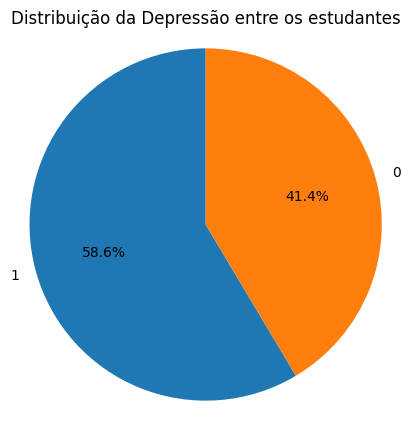

In [464]:
# Contagem dos valores da coluna 'Depressão'

valores = dados_tratbas['Depressão'].value_counts()
labels = valores.index

# Gráfico de pizza

plt.figure(figsize=(5, 5))
plt.pie(valores, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Distribuição da Depressão entre os estudantes')
plt.axis('equal')
plt.show()

Pelo primeiro gráfico, verifca-se que existe um maior número de estudantes enfrentando depressão entre os analisados, no entanto essa diferença é de certa forma pequena. Do ponto de vista do pré-processamento para utilização de modelos de machine learning, esse desbalanceamento na variável target não é considerado crítico. Portanto, não há necessidade futura de balanceamento de classes.

### Relação gênero e depressão

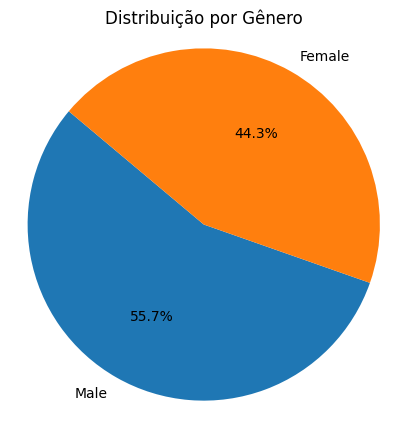

In [465]:
# Contagem de homens e mulheres no total

genero_total = dados_tratbas['Gênero'].value_counts()

# Gráfico de pizza

plt.figure(figsize=(5,5))
plt.pie(
    genero_total,
    labels=genero_total.index,
    autopct='%1.1f%%',
    startangle=140)
plt.title('Distribuição por Gênero')
plt.axis('equal')
plt.show()


Sendo assim, a maioria dos estudantes analisados são homens.

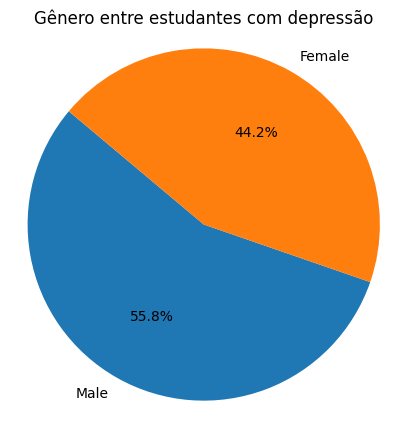

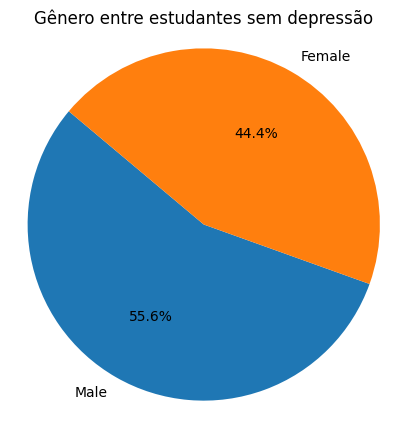

In [466]:
# Filtra estudantes com depressão

com_depressao = dados_tratbas[dados_tratbas['Depressão'] == 1]
genero_com_depressao = com_depressao['Gênero'].value_counts()

plt.figure(figsize=(5,5))
plt.pie(genero_com_depressao, labels=genero_com_depressao.index, autopct='%1.1f%%', startangle=140)
plt.title('Gênero entre estudantes com depressão')
plt.axis('equal')
plt.show()

# Filtra estudantes sem depressão

sem_depressao = dados_tratbas[dados_tratbas['Depressão'] == 0]
genero_sem_depressao = sem_depressao['Gênero'].value_counts()

plt.figure(figsize=(5,5))
plt.pie(genero_sem_depressao, labels=genero_sem_depressao.index, autopct='%1.1f%%', startangle=140)
plt.title('Gênero entre estudantes sem depressão')
plt.axis('equal')
plt.show()

Não é possível afirmar que estudantes homens são em geral mais deprimidos que estudantes mulheres. Mesmo que o primeiro gráfico aponte que existão mais homens com depressão no conjunto de dados, lembramos que a própria distribuição de homens e mulheres é levemente desequilibrada (mais homens que mulheres).

## Estatísticas descritivas

As estatísticas descritivas são fundamentais para apontar uma visão geral dos dados, permitindo identificar padrões, tendências centrais (média, mediana, moda) e possíveis anomalias (outliers). Elas ajudam a compreender o comportamento das variáveis, sejam elas quantitativas ou qualitativas.

In [467]:
# Exibindo o sumário estatístico dos atributos númericos

dados_tratbas.describe()

,Idade,P.Acadêmica,P.Trabalho,CGPA,S.Acadêmica,S.Trabalho,Horas estudo/trabalho,Estr. Financeiro,Depressão
count,27891.000000,27891.000000,27891.00000,27891.000000,27891.000000,27891.000000,27891.000000,27891.000000,27891.000000
mean,25.821878,3.141479,0.00043,7.656147,2.944176,0.000681,7.156861,3.140045,0.585565
std,4.905990,1.381532,0.04400,1.470808,1.361117,0.044402,3.707718,1.437237,0.492633
min,18.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,21.000000,2.000000,0.00000,6.290000,2.000000,0.000000,4.000000,2.000000,0.000000
50%,25.000000,3.000000,0.00000,7.770000,3.000000,0.000000,8.000000,3.000000,1.000000
75%,30.000000,4.000000,0.00000,8.920000,4.000000,0.000000,10.000000,4.000000,1.000000
max,59.000000,5.000000,5.00000,10.000000,5.000000,4.000000,12.000000,5.000000,1.000000


Podemos observar por esse resumo estatístico as seguintes informações:

- A maioria dos estudantes analisados são jovens (75% deles não passam dos 30 anos);
- A média dos atributos P. Trabalho e S. Trabalho são próximas de zero (assim como seus desvios padrão), o que pode indicar que na verdade a grande maioria desses estudantes não trabalham ao mesmo tempo que estudam;
- Como a depressão é uma variável binária aqui, a média indica exatamente a porcentagem de estudantes com depressão, indicando um certo equilíbrio entre as observações;
- A média do CGPA (que indica desempenho acadêmico) mostra que talvez seja um grupo de estudantes com bom desempenho;


In [468]:
# Exibindo o sumário estatístico dos atributos qualitativos

dados_tratbas.describe(include=[object])

,Gênero,Cidade,Profissão,Sono,Dieta,Graduação,P.Suicidas,Hist. Familiar
count,27891,27891,27891,27891,27891,27891,27891,27891
unique,2,46,14,5,4,28,2,2
top,Male,Kalyan,Student,'Less than 5 hours',Unhealthy,'Class 12',Yes,No
freq,15545,1570,27860,8307,10313,6079,17653,14391


Pela tabela, é possível perceber que a maioria desses estudantes são homens. Além disso, quase todos são apenas estudantes (comprovando o que foi dito anteriormente). A maioria também respondeu que sim à pergunta de se já teve algum pensamento suicida.


## Gráficos

Os gráficos de distribuição de frequência e histogramas ajudam a entender como os valores se distribuem, revelando padrões como simetria ou concentração. Os de boxplot são úteis para visualizar a dispersão e detectar outliers em variáveis numéricas. Já os gráficos de correlação destacam relações lineares entre variáveis numéricas. Variáveis altamente correlacionadas podem indicar redundância de informações, o que pode prejudicar a performance de alguns modelos de machine learning.

### Atributos categóricos

#### *Gênero*, *Pensamento Suicida*, *Histórico Familiar*, *Sono*, *Dieta*, *Graduação* e *Profissão*

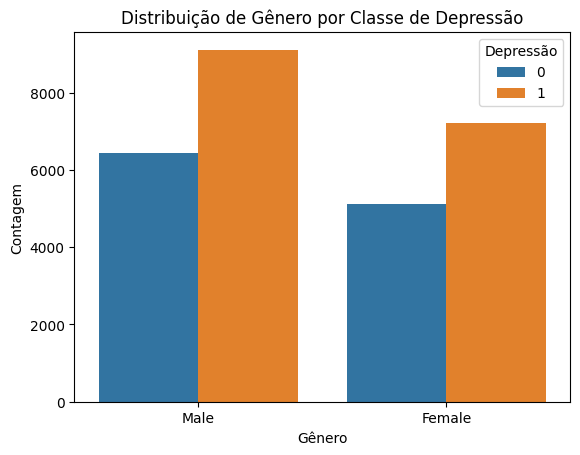

In [469]:
sns.countplot(data=dados_tratbas, x='Gênero', hue='Depressão')
plt.title('Distribuição de Gênero por Classe de Depressão')
plt.ylabel('Contagem')
plt.xlabel('Gênero')
plt.show()

Essa relação já foi comentada anteriormente.

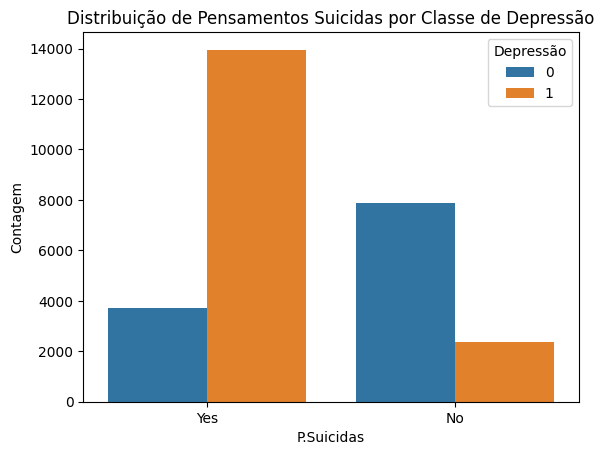

In [470]:
sns.countplot(data=dados_tratbas, x='P.Suicidas', hue='Depressão')
plt.title('Distribuição de Pensamentos Suicidas por Classe de Depressão')
plt.ylabel('Contagem')
plt.xlabel('P.Suicidas')
plt.show()


A maior diferença de estudantes (com depressão e sem depressão) existe se estivermos analisando aqueles que responderam sim para pensamentos suicidas. O que é intuitivo, já que entre aqueles que nunca tiveram esses pensamentos, a maioria não tem depressão.

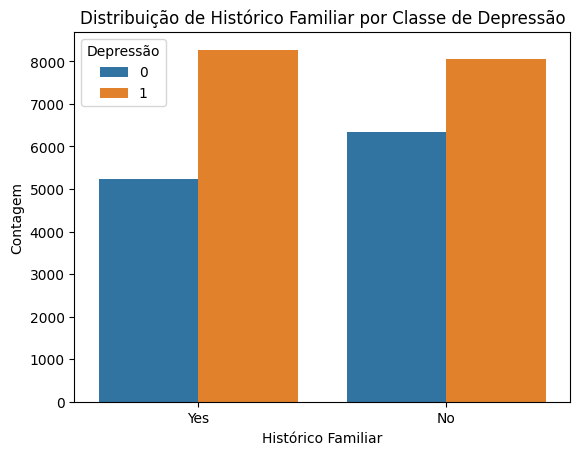

In [471]:
# Corrigindo a ordem para ficar padrão com o gráfico anterior

ordem_histfam = ['Yes', 'No']

sns.countplot(data=dados_tratbas, x='Hist. Familiar', hue='Depressão', order=ordem_histfam)
plt.title('Distribuição de Histórico Familiar por Classe de Depressão')
plt.ylabel('Contagem')
plt.xlabel('Histórico Familiar')
plt.show()

A maior diferença de estudantes (com depressão e sem depressão) existe se estivermos observando apenas aqueles que tem histórico familiar.

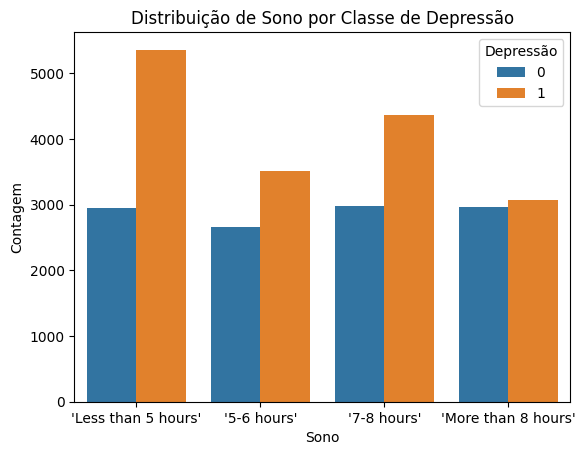

In [472]:
# Corrigindo a ordem de menos sono para mais sono no eixo do x e retirando "others" para melhor visualização

ordem_sono = ["'Less than 5 hours'","'5-6 hours'", "'7-8 hours'", "'More than 8 hours'"]

sns.countplot(data=dados_tratbas, x='Sono', hue='Depressão', order=ordem_sono)
plt.title('Distribuição de Sono por Classe de Depressão')
plt.ylabel('Contagem')
plt.xlabel('Sono')
plt.show()

A maior diferença de estudantes (com depressão e sem depressão) existe quando a quantidade de horas média de sono é menor que 5 horas. No caso de mais de oito horas de sono, existe um maior equilíbrio entre as classes.

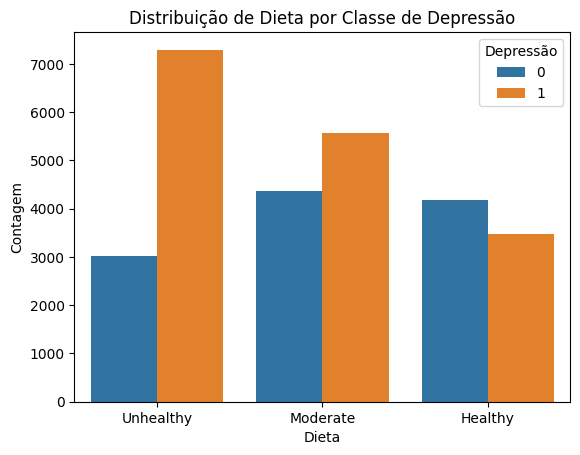

In [473]:
# Corrigindo a ordem de menos saudável para mais saudável e retirando "others" para melhor visualização

ordem_dieta = ["Unhealthy",'Moderate', 'Healthy']

sns.countplot(data=dados_tratbas, x='Dieta', hue='Depressão', order=ordem_dieta)
plt.title('Distribuição de Dieta por Classe de Depressão')
plt.ylabel('Contagem')
plt.xlabel('Dieta')
plt.show()

Da mesma forma como no sono, hábitos não saudáveis na alimentação também sugerem maior desequilíbrio entre as classes.

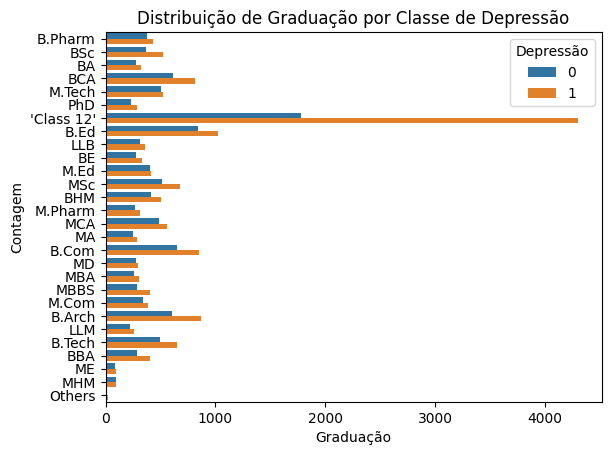

In [474]:
# Mudei para um gráfico de barras horizontais porque no caso de colunas os nomes das graduações ficariam sobrepostos

sns.countplot(data=dados_tratbas, y='Graduação', hue='Depressão')
plt.title('Distribuição de Graduação por Classe de Depressão')
plt.ylabel('Contagem')
plt.xlabel('Graduação')
plt.show()

A graduação de destaque nesse gráfico é a Class 12. Isso porque ela foi identificada em um expressivo número de estudantes (já vimos nas estatísticas descritivas que é a graduação de maior frequência entre os estudantes do conjunto de dados) e apresenta o maior desequílibro entre aqueles com depressão e aqueles sem. Class 12 é o último ano do ensino médio, logo a maioria dos estudantes desse dataset ainda nem iniciarem os estudos no nível superior.

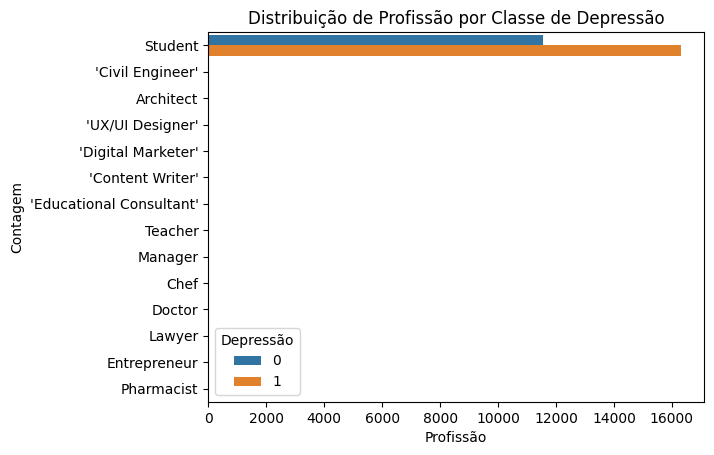

In [475]:
# Da mesma forma como em graduação, mudei para um gráfico de barras horizontais porque no caso de colunas os nomes das profissões ficariam sobrepostos

sns.countplot(data=dados_tratbas, y='Profissão', hue='Depressão')
plt.title('Distribuição de Profissão por Classe de Depressão')
plt.ylabel('Contagem')
plt.xlabel('Profissão')
plt.show()

Como visto nas estatísticas gerais das variáveis qualitativas, quase a totalidade das observações são de estudantes que apenas estudam.

Observação: Não foi necessária a análise de frequência das cidades porque existem muitas cidades (ficaria um gráfico com muita informação) e não julgo determinante para a análise das hipóteses propostas.

### Atributos numéricos

A fim de compreender melhor as hipóteses destacadas no início do projeto, a visualização dos atributos numéricos auxiliam na análise. Iniciarei com a visualização dos histogramas desses atributos para em seguida analisar os boxplots.


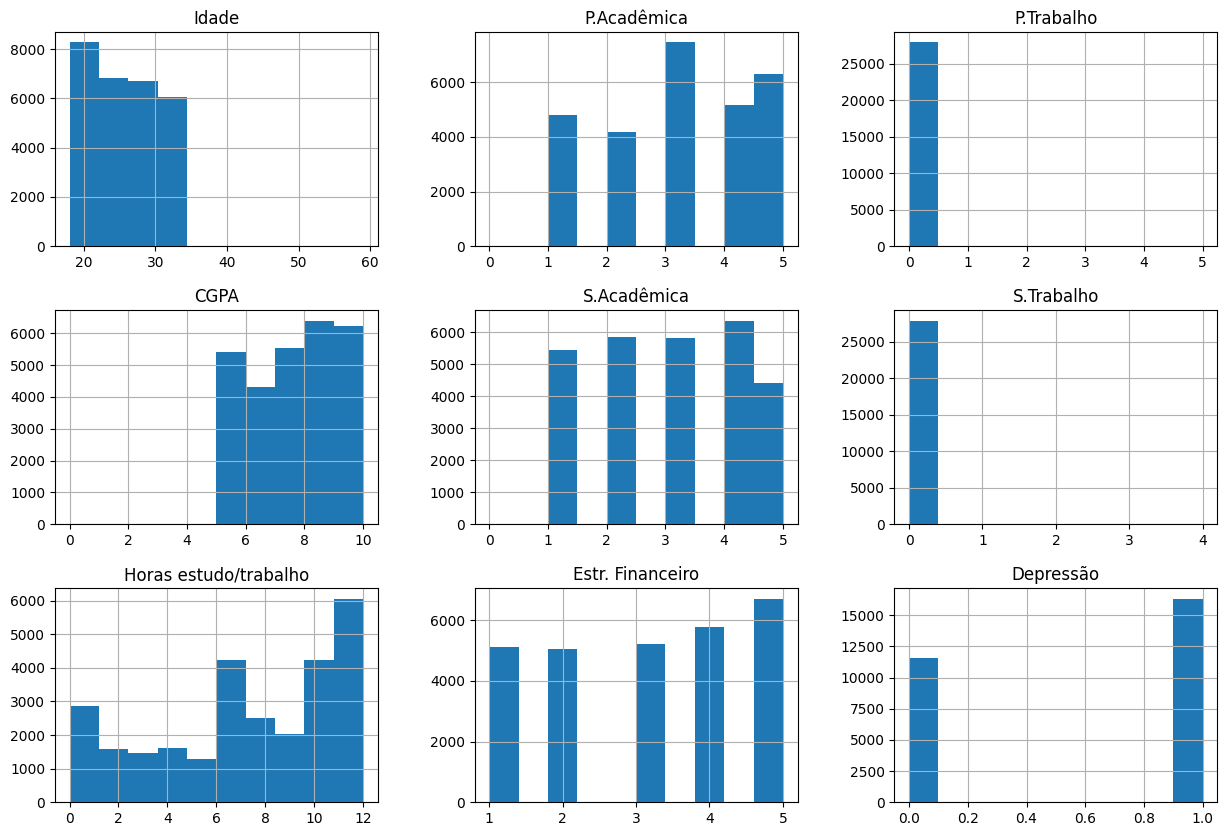

In [476]:
# Histograma das variáveis numéricas

dados_tratbas.hist(figsize = (15,10))
plt.show()

#### Numéricos que são da escala 0-5

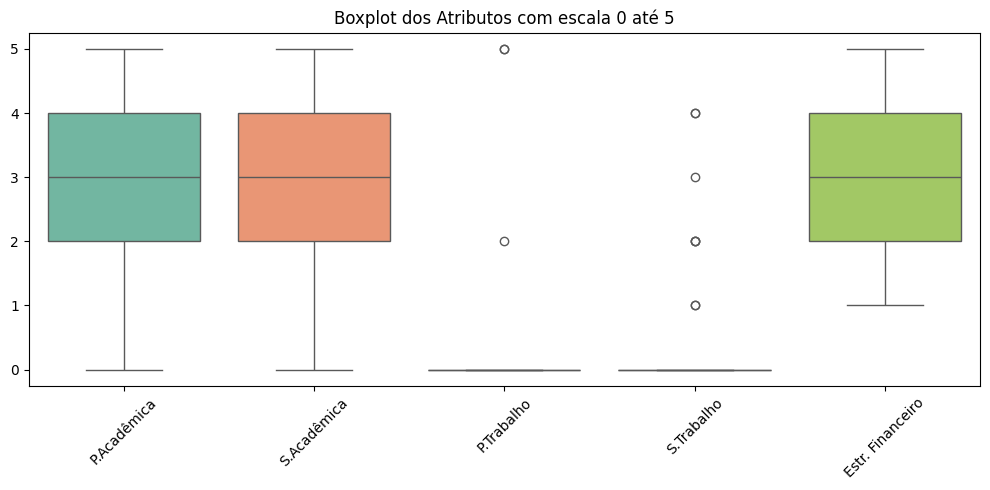

In [477]:
atributos_escala05 = ['P.Acadêmica', 'S.Acadêmica', 'P.Trabalho', 'S.Trabalho', 'Estr. Financeiro']

# Boxplots no conjunto todo

plt.figure(figsize=(10, 5))
sns.boxplot(data=dados_tratbas[atributos_escala05], palette='Set2')
plt.title('Boxplot dos Atributos com escala 0 até 5')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Podemos perceber que, exceto no caso dos atributos sobre o trabalho, todos os atributos possuem comportamentos parecidos (primeiro, segundo e terceiro quartis muito próximos e na região de resposta "moderada" para cada atributo). Além disso, indica distribuição simétrica dos dados. No caso de P.Trabalho e S.Trabalho, os outliers podem estar representando aqueles que conciliam estudos com trabalho.

##### Pressão Acadêmcia por Classe

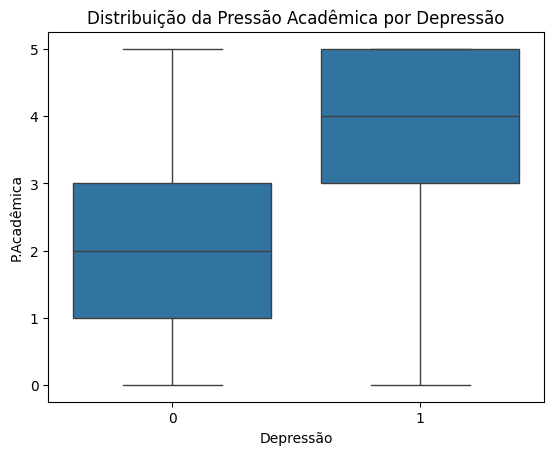

,count,mean,std,min,25%,50%,75%,max
Depressão,,,,,,,,
0,11559.0,2.361883,1.253106,0.0,1.0,2.0,3.0,5.0
1,16332.0,3.693240,1.188940,0.0,3.0,4.0,5.0,5.0


In [478]:
# Boxplot por classe

sns.boxplot(data=dados_tratbas, x='Depressão', y='P.Acadêmica')
plt.title("Distribuição da Pressão Acadêmica por Depressão")
plt.show()

# Estatísticas descritivas agrupadas por classe (apenas para P.Acadêmica)

dados_tratbas.groupby('Depressão').describe().loc[:, 'P.Acadêmica']

##### Satisfação Acadêmcia por Classe

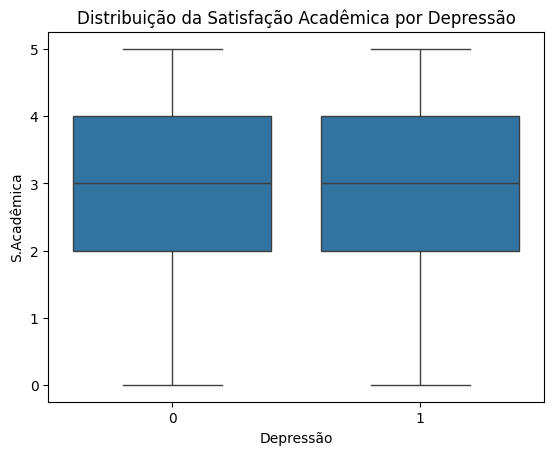

,count,mean,std,min,25%,50%,75%,max
Depressão,,,,,,,,
0,11559.0,3.216282,1.327211,0.0,2.0,3.0,4.0,5.0
1,16332.0,2.751592,1.351948,0.0,2.0,3.0,4.0,5.0


In [479]:
# Boxplot por classe

sns.boxplot(data=dados_tratbas, x='Depressão', y='S.Acadêmica')
plt.title("Distribuição da Satisfação Acadêmica por Depressão")
plt.show()

# Estatísticas descritivas agrupadas por classe (apenas para S.Acadêmica)

dados_tratbas.groupby('Depressão').describe().loc[:, 'S.Acadêmica']

#### Idade e Idade por Classe

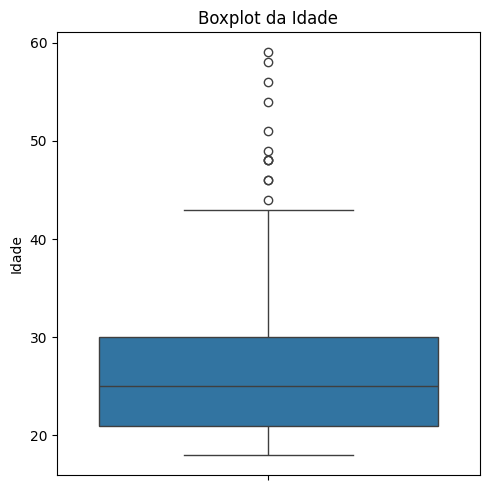

In [480]:
# Boxplot

plt.figure(figsize=(5, 5))
sns.boxplot(data=dados_tratbas['Idade'])
plt.title('Boxplot da Idade')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Existem alguns outliers (indicações acima do "bigode" do boxplot) bem mais velhos que os demais estudantes e o gráfico também indica simetria na distribuição (mediana no centro da caixa).

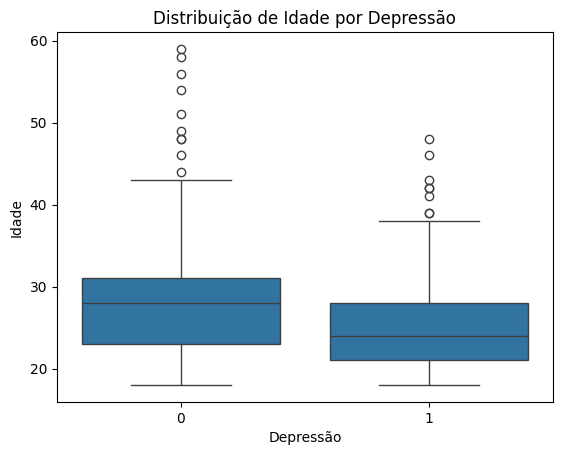

,count,mean,std,min,25%,50%,75%,max
Depressão,,,,,,,,
0,11559.0,27.142400,4.943946,18.0,23.0,28.0,31.0,59.0
1,16332.0,24.887277,4.658094,18.0,21.0,24.0,28.0,48.0


In [481]:
# Boxplot por classe

sns.boxplot(data=dados_tratbas, x='Depressão', y='Idade')
plt.title("Distribuição de Idade por Depressão")
plt.show()

# Estatísticas descritivas agrupadas por classe (apenas para Idade)

dados_tratbas.groupby('Depressão').describe().loc[:, 'Idade']

#### Horas estudo/trabalho e Horas estudo/trabalho por Classe

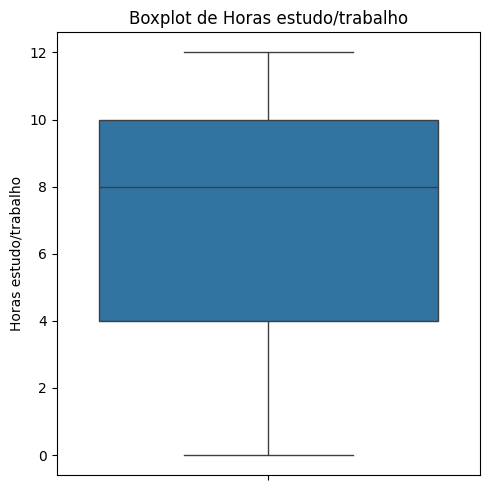

In [482]:
# Boxplot

plt.figure(figsize=(5, 5))
sns.boxplot(data=dados_tratbas['Horas estudo/trabalho'])
plt.title('Boxplot de Horas estudo/trabalho')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

No caso de Horas estudo/trabalho, o gráfico indica uma distribuição assimétrica a esquerda (mediana na região de cima do box). Isso também foi confirmado com a visualização do histograma desse atributo, anteriormente.

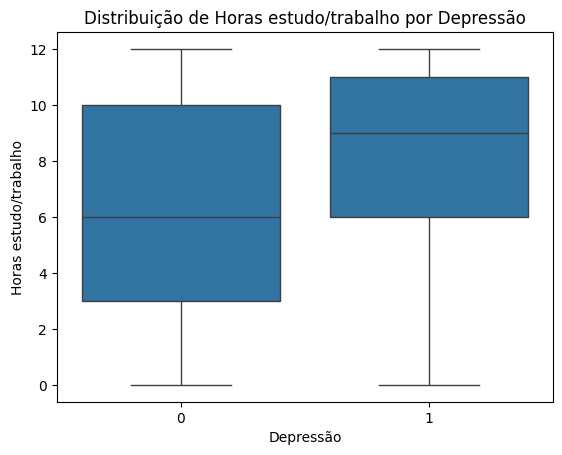

,count,mean,std,min,25%,50%,75%,max
Depressão,,,,,,,,
0,11559.0,6.237391,3.861244,0.0,3.0,6.0,10.0,12.0
1,16332.0,7.807617,3.450176,0.0,6.0,9.0,11.0,12.0


In [483]:
# Boxplot por classe

sns.boxplot(data=dados_tratbas, x='Depressão', y='Horas estudo/trabalho')
plt.title("Distribuição de Horas estudo/trabalho por Depressão")
plt.show()

# Estatísticas descritivas agrupadas por classe (apenas para Horas estudo/trabalho)

dados_tratbas.groupby('Depressão').describe().loc[:, 'Horas estudo/trabalho']

#### CGPA (desempenho acadêmico) e CGPA por Classe

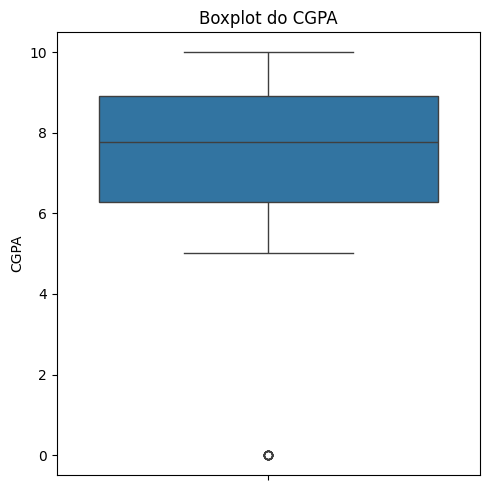

In [484]:
# Boxplot

plt.figure(figsize=(5, 5))
sns.boxplot(data=dados_tratbas['CGPA'])
plt.title('Boxplot do CGPA')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Esse gráfico mostra que:
 - Existem outliers com desempenho nulo nos estudos;
 - Simetria na distribuição;
 - Quartis maiores que 6 (estudantes de médio/alto rendimento)


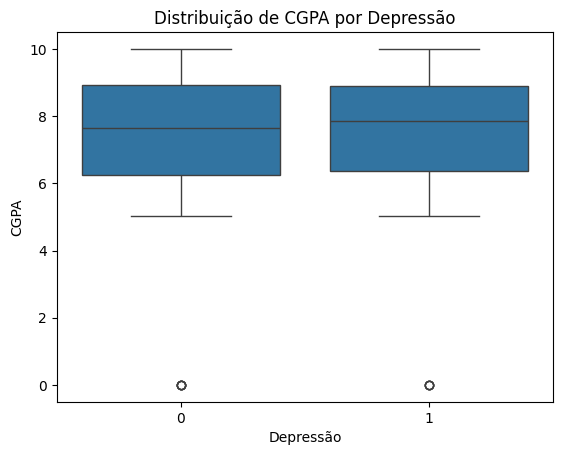

,count,mean,std,min,25%,50%,75%,max
Depressão,,,,,,,,
0,11559.0,7.617378,1.492408,0.0,6.25,7.64,8.93,10.0
1,16332.0,7.683586,1.454749,0.0,6.37,7.85,8.91,10.0


In [485]:
# Boxplot por classe

sns.boxplot(data=dados_tratbas, x='Depressão', y='CGPA')
plt.title("Distribuição de CGPA por Depressão")
plt.show()

# Estatísticas descritivas agrupadas por classe (apenas para CGPA)

dados_tratbas.groupby('Depressão').describe().loc[:, 'CGPA']

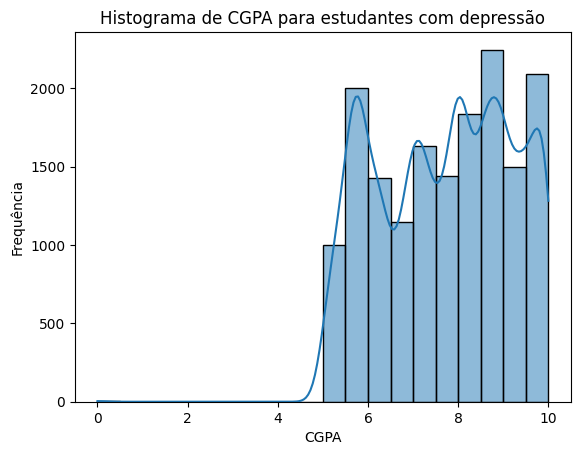

In [486]:
# Histograma do CGPA

# Filtra apenas os casos com depressão = 1

dados_com_depressao = dados_tratbas[dados_tratbas['Depressão'] == 1]

sns.histplot(data=dados_com_depressao, x='CGPA', kde=True, bins=20)
plt.title('Histograma de CGPA para estudantes com depressão')
plt.xlabel('CGPA')
plt.ylabel('Frequência')
plt.show()

O desempenho acadêmico parece ser bem balenceado entre os estudantes com depressão e sem depressão e há uma sobreposição bem grande entre as classes. Ou seja, não é possível identificar de imediato um padrão de notas que distingue esses estudantes que desenvolveram depressão. O atributo CGPA em si não é capaz de determinar/auxiliar na identificação. Até aqueles que tem um desempenho muito baixo podem não estar com depressão ou aqueles que tem um desempenho muito alto podem estar com depressão.

### Correlação

Esta informação é relevante porque alguns algoritmos como regressão linear e regressão logística podem apresentar problemas de performance se houver atributos altamente correlacionados.

In [487]:
# Criando tabela de correlação entre os atributos numéricos

dados_tratbas.select_dtypes(include='number').corr(method = 'pearson')

,Idade,P.Acadêmica,P.Trabalho,CGPA,S.Acadêmica,S.Trabalho,Horas estudo/trabalho,Estr. Financeiro,Depressão
Idade,1.000000,-0.075792,0.002016,0.005100,0.009352,-0.000431,-0.032900,-0.094894,-0.226447
P.Acadêmica,-0.075792,1.000000,-0.022236,-0.022332,-0.111178,-0.024951,0.096030,0.151547,0.474742
P.Trabalho,0.002016,-0.022236,1.000000,-0.050902,-0.021152,0.770652,-0.005469,0.001882,-0.003353
CGPA,0.005100,-0.022332,-0.050902,1.000000,-0.044161,-0.053638,0.002655,0.005729,0.022176
S.Acadêmica,0.009352,-0.111178,-0.021152,-0.044161,1.000000,-0.021915,-0.036545,-0.065249,-0.168187
S.Trabalho,-0.000431,-0.024951,0.770652,-0.053638,-0.021915,1.000000,-0.005223,0.005247,-0.003484
Horas estudo/trabalho,-0.032900,0.096030,-0.005469,0.002655,-0.036545,-0.005223,1.000000,0.075240,0.208631
Estr. Financeiro,-0.094894,0.151547,0.001882,0.005729,-0.065249,0.005247,0.075240,1.000000,0.363437
Depressão,-0.226447,0.474742,-0.003353,0.022176,-0.168187,-0.003484,0.208631,0.363437,1.000000


<Axes: >

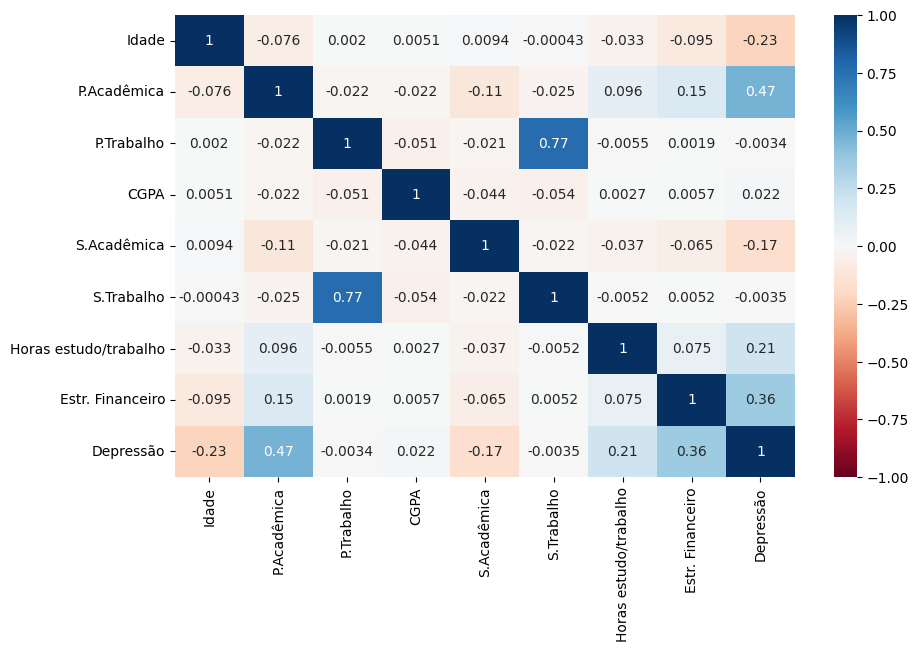

In [488]:
# Matriz de Correlação com Seaborn

plt.figure(figsize = (10,6))
sns.heatmap(dados_tratbas.select_dtypes(include='number').corr(), annot=True, cmap='RdBu', vmin=-1, vmax=1)

Podemos ver que não existem fortes correlações lineares entre os atributos, exceto entre P.Trabalho e S.Trabalho (mas vimos que são atributos com pouquíssimas observações que não são 0.0, dado que a maioria não trabalha). No entanto, vale destacar um pouco de correlação entre S.Acadêmica e P.Acadêmica (-0,11). Isso sugere algo intuitivo entre essa variáveis (maior satisfação quanto menor a pressão). Além disso, Estr. Financeiro possui certa correlação (baixa também) com P.Acadêmica (0,15). Isso possivelmente se deve ao fato de que estudantes diante de muito estresse financeiro podem experimentar alta pressão nos estudos para melhorar sua condição financeira.

## Tratamento de Outliers nos atributos quantitativos Idade e CGPA

Vimos que Idade e CGPA apresentam outliers que distorcem a média e o desvio padrão. Como posteriormente irei padronizar esses dados a fim de deixá-los prontos para possível utilização de modelos sensíveis à escala, é importante tratar esses valores extremos (principalmente se forem poucos).

### Outliers de Idade

In [489]:
#  Detectando outliers com o método IQR

Q1 = dados_tratbas['Idade'].quantile(0.25)
Q3 = dados_tratbas['Idade'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

outliers = dados_tratbas[(dados_tratbas['Idade'] < limite_inferior) | (dados_tratbas['Idade'] > limite_superior)]
print(f'{len(outliers)} outliers encontrados')

12 outliers encontrados


In [490]:
# Removendo outliers (aqui optei por retirar e não preencher com valor de tendencia central)

dadostratbas_sem_outliers1 = dados_tratbas[(dados_tratbas['Idade'] >= limite_inferior) & (dados_tratbas['Idade'] <= limite_superior)]

### Outliers de CGPA

In [491]:
Q1 = dadostratbas_sem_outliers1['CGPA'].quantile(0.25)
Q3 = dadostratbas_sem_outliers1['CGPA'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

print(f'Limites: {limite_inferior:.2f} a {limite_superior:.2f}')
outliers = dadostratbas_sem_outliers1[(dadostratbas_sem_outliers1['CGPA'] < limite_inferior) | (dadostratbas_sem_outliers1['CGPA'] > limite_superior)]
print(f'{len(outliers)} outliers encontrados em CGPA')

Limites: 2.35 a 12.87
9 outliers encontrados em CGPA


In [492]:
# Removendo outliers (aqui optei por retirar e não preencher com valor de tendencia central)

dadostratbas_sem_outliers2 = dadostratbas_sem_outliers1[(dadostratbas_sem_outliers1['CGPA'] >= limite_inferior) & (dadostratbas_sem_outliers1['CGPA'] <= limite_superior)]

In [493]:
# Dimensões finais do dataset trabalhado:

dadostratbas_sem_outliers2.shape

(27870, 17)

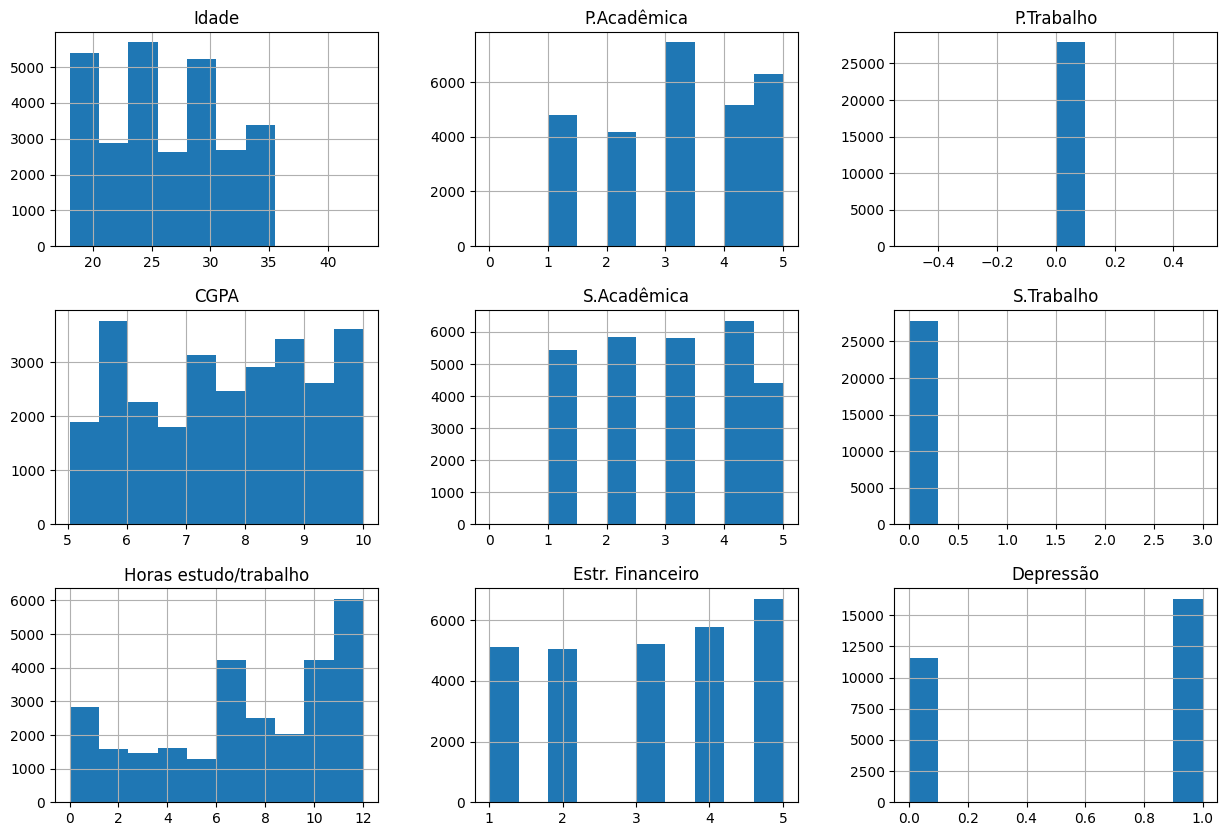

In [494]:
# Histograma das variáveis numéricas após tratamento de outliers

dadostratbas_sem_outliers2.hist(figsize = (15,10))
plt.show()

# Pré-Processamento de Dados

O pré-processamento é uma etapa crucial para adaptar os dados aos requisitos dos algoritmos de machine learning. O mapeamento de variáveis binárias converte respostas como "Yes" e "No" e "Male" e "Female" em valores numéricos (1 e 0), facilitando o processamento. A codificação ordinal é aplicada a categorias com ordem lógica, preservando sua hierarquia em valores numéricos (no caso desse conjunto dados, alguns já vieram nesse formato - P.Acadêmica, S.Acadêmica, P.Trabalho. S.Trabalho e Estr. Financeiro). O One-Hot Encoding trata variáveis categóricas sem ordem, criando colunas binárias para cada categoria. Por fim, a padronização ajusta variáveis numéricas para uma mesma escala, evitando que atributos com magnitudes diferentes (caso de idade, nota e horas de estudo/trabalho) influenciem negativamente o modelo.

## Definição do target, variáveis e divisão dos dados

Foi definida a variável alvo (**target**) do problema, representando o resultado que desejamos prever. Para as variáveis preditoras (**features**), foram consideradas tanto variáveis numéricas quanto categóricas, com base em sua relevância. Para garantir uma avaliação justa do desempenho do modelo, os dados foram divididos em conjuntos de treino e teste de forma estratificada, preservando a proporção entre as classes da variável alvo (stratify = y). Além disso, utilizou-se validação cruzada durante o treinamento, o que permitiu avaliar o modelo com diferentes subconjuntos dos dados de treino, aumentando a robustez da avaliação e reduzindo o risco de overfitting. Utilizei 80% dos dados para o treino do modelo e 20% para teste.

In [495]:
# Separar features (X) e target (y)

target = "Depressão"
features = [c for c in dadostratbas_sem_outliers2.columns if c not in [target]]

print("Target:", target)
print("N features:", len(features))

Target: Depressão
N features: 16


In [496]:
# Dividir os dados em conjuntos de treino e teste

X = dadostratbas_sem_outliers2[features].copy()
y = dadostratbas_sem_outliers2[target].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED, stratify=y)

# Parâmetros e partições da validação cruzada

scoring = 'accuracy' # para problemas de classificação, a métrica mais utilizada é a acurácia, ou taxa de acerto do classificador (como as classes estão bem balanceadas, julgo aceitável avaliar pela acurácia)
num_particoes = 5
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=SEED) # validação cruzada com estratificação que será usada posteriormente


In [497]:
print(f"Dimensões de X_train: {X_train.shape}")
print(f"Dimensões de X_test: {X_test.shape}")
print(f"Dimensões de y_train: {y_train.shape}")
print(f"Dimensões de y_test: {y_test.shape}")

Dimensões de X_train: (22296, 16)
Dimensões de X_test: (5574, 16)
Dimensões de y_train: (22296,)
Dimensões de y_test: (5574,)


## Tratamento de dados e Pipeline de pré-processamento

Na etapa de tratamento de dados, foram realizadas transformações adequadas para preparar as variáveis para o modelo (como mencionado anteriormente). Essas etapas foram organizadas em um pipeline de pré-processamento utilizando as ferramentas do Scikit-learn, assegurando que todas as transformações fossem aplicadas de forma consistente nos dados de treino e teste, além de facilitar a reprodução e a integração com o processo de modelagem.

In [498]:
# Colunas por tipo

colunas_numericas = ['Idade', 'CGPA', 'Horas estudo/trabalho']
colunas_ordinal = ['Sono', 'Dieta']
colunas_binarias = ['Gênero', 'P.Suicidas', 'Hist. Familiar']
colunas_onehot = ['Cidade', 'Profissão', 'Graduação']
colunas_escala05 = ['P.Acadêmica', 'S.Acadêmica', 'P.Trabalho', 'S.Trabalho', 'Estr. Financeiro']  # já como números

# Ordem definida manualmente para as ordinais

ordinal_mappings = [["'Less than 5 hours'", "'5-6 hours'", "'7-8 hours'", "'More than 8 hours'", 'Others'],
    ['Unhealthy', 'Moderate', 'Healthy', 'Others']]

# Padronização apenas dos atributos numéricos (sem contar os numéricos que descrevem uma ordem - Numéricos de escala 0 a 5)

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Ordinais: Com ordem definida anteriormente

ordinal_transformer = Pipeline(steps=[
    ('ordinal', OrdinalEncoder(categories=ordinal_mappings))
])

# Binárias: Mapear sim/não, male/female para 0 e 1

def map_binary(X):
    return X.replace({
        'Yes': 1, 'No': 0,
        'Male': 1, 'Female': 0
    })

binary_transformer = Pipeline(steps=[
    ('binary_mapper', FunctionTransformer(map_binary))
])

# Categóricas nominais: OneHotEncoding com drop_first=True

onehot_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))
])

# Atributos de escala 0-5: passam direto (não transformamos)

passthrough_transformer = 'passthrough'

# Compondo o ColumnTransformer

preprocess = ColumnTransformer(transformers=[
    ('num', numeric_transformer, colunas_numericas),
    ('ord', ordinal_transformer, colunas_ordinal),
    ('bin', binary_transformer, colunas_binarias),
    ('cat', onehot_transformer, colunas_onehot),
    ('scale5', passthrough_transformer, colunas_escala05)
])


# Modelagem e inferência

A etapa de modelagem e inferência consiste, de forma simplificada, em escolher o modelo mais adequado para resolver o problema em questão.


## Baseline e modelos candidatos

Nesta seção são definidos e avaliados um modelo baseline - DummyClassifier (que sempre prediz a classe mais frequente) + três modelos candidatos - Regressão Logística, Random Forest e KNN, todos integrados a um pipeline com pré-processamento. Cada modelo foi treinado nos dados de treino e avaliado *diretamente no conjunto de teste*, com as métricas armazenadas para comparação. Ainda não foi aplicada validação cruzada, pois essa etapa será realizada na seção seguinte para uma avaliação mais robusta dos modelos.

In [499]:
# Baseline (sempre prediz a classe mais frequente)

baseline = Pipeline(steps=[("pre", preprocess),
                               ("model", DummyClassifier(strategy="most_frequent", random_state=SEED))])

# Candidatos (selecionei um algoritmo capaz de capturar relações lineares (LR), outro capaz de capturar relações não lineares (RF) e um que classifica com base na proximidade com os vizinhos (KNN))

candidates = {
    "LogisticRegression": Pipeline([
        ("pre", preprocess),
        ("model", LogisticRegression(max_iter=200, random_state=SEED))
    ]),

    "RandomForest": Pipeline([
        ("pre", preprocess),
        ("model", RandomForestClassifier(random_state=SEED))
    ]),

    "KNN": Pipeline([
        ("pre", preprocess),
        ("model", KNeighborsClassifier())
    ])
}


### **Avaliação direta em teste**

In [500]:
results = {}

# Baseline
baseline.fit(X_train, y_train)
y_pred = baseline.predict(X_test)
proba = baseline.predict_proba(X_test) if hasattr(baseline, "predict_proba") else None
results["baseline"] = evaluate_classification(y_test, y_pred, proba)

# Candidatos
for name, pipe in candidates.items():
  pipe.fit(X_train, y_train)
  y_pred = pipe.predict(X_test)
  proba = pipe.predict_proba(X_test) if hasattr(pipe, "predict_proba") else None
  results[name] = evaluate_classification(y_test, y_pred, proba)

pd.DataFrame(results).T


,accuracy,f1_weighted,roc_auc
baseline,0.585755,0.432739,0.500000
LogisticRegression,0.846071,0.845369,0.920799
RandomForest,0.844815,0.844139,0.915879
KNN,0.808037,0.806364,0.865981


Os modelos de Logistic Regression, Random Forest e KNN apresentam desempenho bem superior ao baseline em todas as métricas, como era de se esperar. A acurácia acima de 0.80 indicam que os classificadores estão conseguindo classificar bem as duas classes, que são razoavelmente balanceadas (como vimos na análise de dados). No caso a diferença grande entre o baseline e os modelos treinados reforça que o pré-processamento e os algoritmos utilizados estão capturando **efetivamente** os sinais importantes para a classificação. Não foi observado underfitting, ou seja, os resultados iniciais de acurácia já foram significativamente melhores que o baseline, especialmente para a regressão logística e a random forest.

### **Avaliação em etapas** (validação cruzada + otimização de hiperparâmetros)

No bloco anterior, foi possível avaliarmos os modelos escolhidos sem validação cruzada e com hiperparâmetros padrão. Ou seja, não necessariamente responde qual o melhor algoritmo a se usar (olhando apenas para a acurácia). Com uma validação cruzada e um tuning é possível testar várias configurações possíveis (não depender apenas da separação inicial fixa) e encontrar os parâmetros ótimos que maximizam o desempenho de cada modelo.

Baseline: 0.585800 (0.000037)
LogisticRegression: 0.848269 (0.006519)
RandomForest: 0.843290 (0.003925)
KNN: 0.810100 (0.003328)


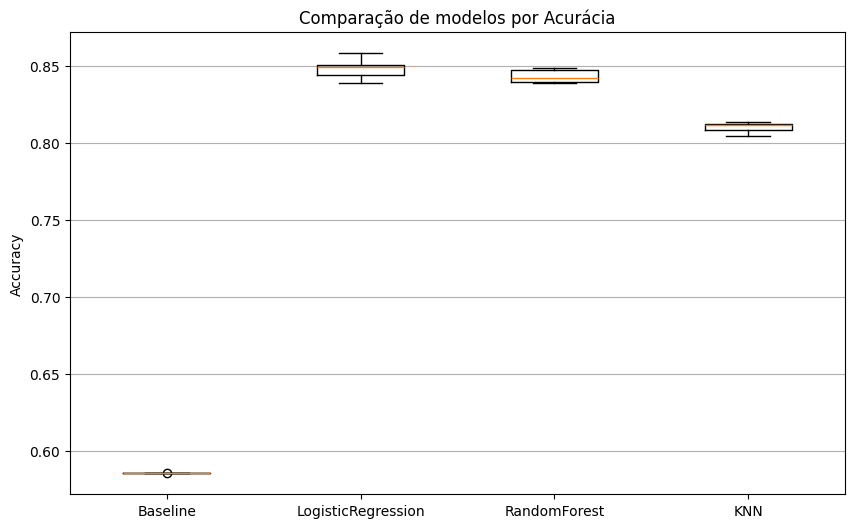

In [501]:
# Listas para armazenar os modelos, seus nomes e os resultados

model_names = []
model_objects = []
model_results = []

# Validação no baseline

model_names.append("Baseline")
model_objects.append(baseline)
score = cross_val_score(baseline, X_train, y_train, cv=kfold, scoring=scoring)
model_results.append(score)
msg = "%s: %f (%f)" % ("Baseline", score.mean(), score.std())
print(msg)

# Validação nos modelos candidatos

for name, model in candidates.items():
    model_names.append(name)
    model_objects.append(model)
    score = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    model_results.append(score)
    msg = "%s: %f (%f)" % (name, score.mean(), score.std())
    print(msg)

# Criando o boxplot de comparação
plt.figure(figsize=(10,6))
plt.boxplot(model_results, labels=model_names)
plt.title('Comparação de modelos por Acurácia')
plt.ylabel('Accuracy')
plt.grid(axis='y')
plt.show()

Com a validação cruzada, verificamos que, considerando a acurácia média, o modelo treinado com o LogisticRegression apresentou (por pouco) o melhor/maior resultado (84,8%). Considerando o desvio padrão, o modelo treinado com o RandomForest apresentou o melhor/menor resultado (0.003925), se mostrando mais estável.

Com o intuito de definir qual modelo será escolhido, seguirei a seguinte lógica: Maior acurácia indicou LogisticRegression, mas como RandomForest também apresentou bom desempenho (na acurácia) em conjunto com boa estabilidade, vou verificar se é possível esse último superar o primeiro com otimização de hiperparâmetros.

In [502]:
# Descrevendo as limitações de cada parâmetro do RandomForest:

param_dist = {
        "model__n_estimators": randint(100, 400),
        "model__max_depth": randint(3, 20),
        "model__min_samples_split": randint(2, 10)
    }

# Apenas para RandomForest

model = candidates["RandomForest"]


search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=10, cv=kfold, scoring=scoring, random_state=SEED, n_jobs=-1, verbose=1)
search.fit(X_train, y_train)
print("Melhor score (CV):", search.best_score_)
print("Melhores parâmetros:", search.best_params_)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Melhor score (CV): 0.8431110255169925
Melhores parâmetros: {'model__max_depth': 14, 'model__min_samples_split': 7, 'model__n_estimators': 393}


Tuning nem sempre melhora o modelo, já que ele busca estabilidade e generalização. Com um split de apenas 5, que possibilitou um tempo razoável de processamento dos dados, e o intervalo limitado para os parâmetros do algoritmo, não foi possível melhorar seu desempenho médio (a nível de acurácia). Então está escolhido o modelo LogisticRegression em seus parâmetros padrão para seguir adiante.


## Avaliação final, análise de erros e limitações

Três algoritmos foram comparados e todos superaram significativamente o desempenho do baseline simples do DummyClassifier, com boa acurácia geral. Entre os modelos testados, a Logistic Regression se destacou por apresentar a maior acurácia, mesmo que os outros algoritmos também tenham mostrado métricas de desempenho satisfatórias. O conjunto de dados se mostrou razoavelmente balanceado, o que facilitou o uso de métricas padrão como acurácia e F1-score para avaliação. Ainda assim, a análise de erros indicou uma leve tendência a falsos positivos, o que pode ser aceitável no contexto de doenças (como o nosso caso de depressão).

              precision    recall  f1-score   support

           0       0.83      0.79      0.81      2309
           1       0.85      0.89      0.87      3265

    accuracy                           0.85      5574
   macro avg       0.84      0.84      0.84      5574
weighted avg       0.85      0.85      0.85      5574



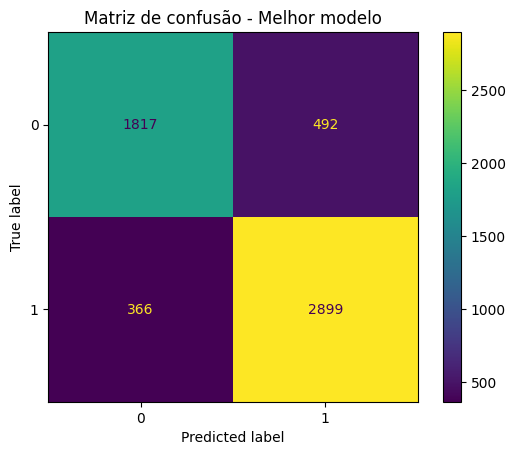

In [503]:
# Criando um modelo com todo conjunto de treino

best_model = candidates["LogisticRegression"]
best_model.fit(X_train, y_train)

# Fazendo as predições com o conjunto de teste

y_pred = best_model.predict(X_test)
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
print(classification_report(y_test, y_pred))
try:
    ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test)
    plt.title("Matriz de confusão - Melhor modelo")
    plt.show()
except Exception as e:
    print("Não foi possível plotar a matriz de confusão:", e)

O modelo de regressão logística com hiperparâmetros padrão alcançou uma acurácia geral de 85%, o que indica uma boa performance. No entanto, ao analisar as métricas por classe, percebe-se um desempenho melhor na identificação de pessoas com depressão (= 1), com um recall de 89%, o que significa que a maioria dos casos positivos foi corretamente identificada. Essa métrica é crucial no nosso caso, já que é mais grave deixar de identificar um positivo (ex: uma pessoa com depressão que não recebe ajuda).

Como limitação e outras possibilidades futuras, destaca-se que o estudo se restringiu a poucos algoritmos e configurações iniciais de validação cruzada. Então, ajustes nos hiperparâmetros ou no número de folds poderiam trazer ganhos adicionais de desempenho. Além disso, poderíamos avaliar a importância de cada atributo para a previsão (quais tem maior peso que outros) ou até mesmo incluir mais variáveis explicativas.

# Conclusão

A análise e o pré-processamento do dataset Student Depression evidenciam como é essencial compreender a estrutura dos dados antes de iniciar a modelagem. O dataset apresenta um equilíbrio razoável entre os estudantes com e sem depressão. Para garantir que os dados estejam compatíveis com os principais algoritmos de machine learning, foram aplicadas diversas etapas de pré-processamento, como mapeamento de variáveis, codificações e padronização, visando uma preparação adequada. A análise exploratória permitiu identificar a presença de outliers, assimetrias, valores mais recorrentes e a dispersão de cada variável, fornecendo auxílio para compreender melhor a forma dos dados e orientar decisões no pré-processamento. A modelagem utilizando algoritmos como Regressão Logística, Random Forest e KNN mostrou que é possível prever razoavelmente se um estudante pode ter depressão a partir das variáveis demográficas, acadêmicas, profissionais e comportamentais disponíveis. O melhor modelo, a Regressão Logística com parâmetros padrão, alcançou uma acurácia em torno de 85%, com destaque para o recall elevado (89%) na classe = 1 (estudantes com depressão), o que é crucial para minimizar falsos negativos em um contexto de saúde mental. Sendo assim, se mostra útil como ferramente auxiliar na identificação precoce de estudantes em risco.

As três hipóteses levantadas foram analisadas (resumidamente) da seguinte forma:

1.   *Existe um comportamento diferente entre as classes (com depressão e sem depressão) em relação ao desempenho acadêmico?*
Não há um comportamento claramente distinto entre as classes em relação ao desempenho acadêmico. Os estudantes com e sem depressão apresentam distribuições bastante semelhantes de CGPA, com grande sobreposição entre os grupos.

2.   *Existe uma correlação entre pressão acadêmica e estresse financeiro?* Embora a correlação entre estresse financeiro e pressão acadêmica seja baixa (0,15), nota-se uma possível relação entre esses. Sugerindo que estudantes sob maior estresse financeiro podem sentir mais pressão nos estudos, talvez como uma tentativa de melhorar sua situação econômica por meio do bom desempenho.

3.   *Estudantes que dormem menos tem maior chance de desenvolverem depressão?* Sim, estudantes que dormem menos parecem ter maior chance de desenvolver depressão. A maior diferença entre as classes foi observada entre aqueles que dormem, em média, menos de 5 horas por dia — grupo no qual há predominância de estudantes com depressão. Já, entre os que dormem mais de 8 horas, a distribuição entre com e sem depressão é mais equilibrada.

4.   *É possível prever razoavelmente qual estudante pode ter ou não depressão com base em variáveis demográficas, acadêmicas, profissionais e comportamentais?* Sim, com base nos resultados da modelagem, é possível prever razoavelmente se um estudante tem ou não depressão a partir dos atributos demográficos, acadêmicos, profissionais e comportamentais disponíveis no dataset.